In [73]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.cluster import KMeans
import glob


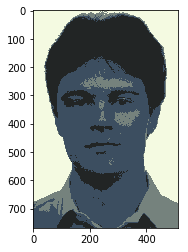

In [3]:
bgr_img=cv2.imread("Images/Original Images/img_001.jpg")
reshaped_bgr =bgr_img.reshape(bgr_img.shape[0] * bgr_img.shape[1],bgr_img.shape[2])
kmeans=KMeans(n_clusters=4)
quantized_img=kmeans.fit_predict(reshaped_bgr)

quantized_img = [ kmeans.cluster_centers_[cl] for cl in quantized_img ]
quantized_img=np.array(quantized_img).reshape(bgr_img.shape[0] , bgr_img.shape[1],bgr_img.shape[2])
plt.imshow(quantized_img.astype(np.uint8))
plt.show()

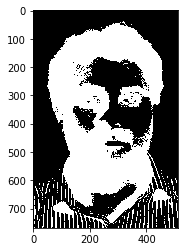

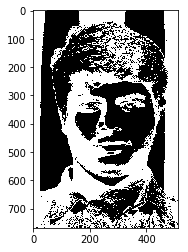

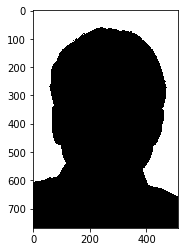

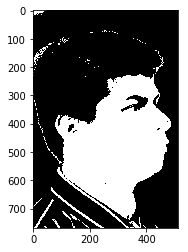

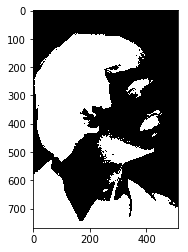

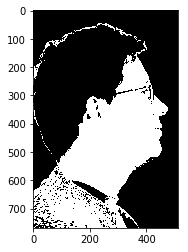

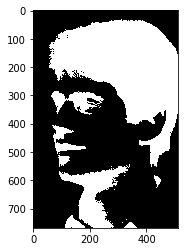

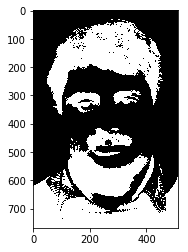

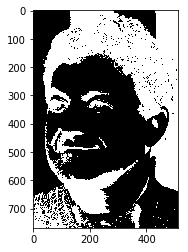

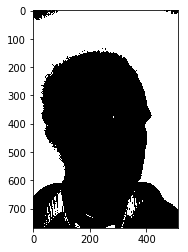

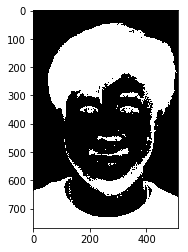

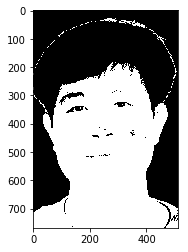

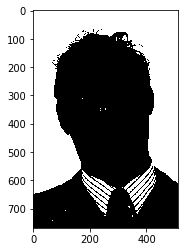

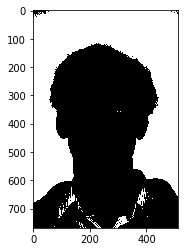

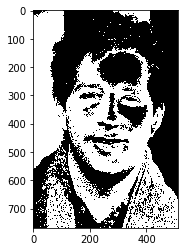

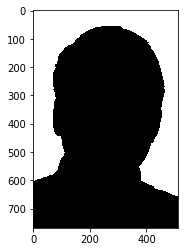

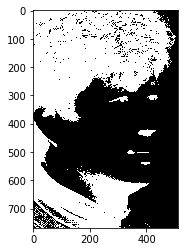

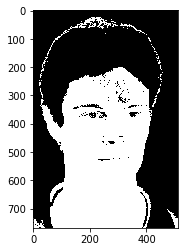

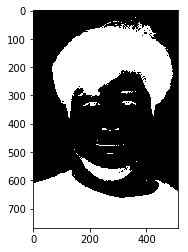

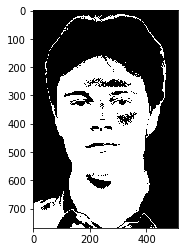

In [74]:
for img_path in glob.glob("Images/Original Images/*.jpg"):

    bgr_img=cv2.imread(img_path)
    reshaped_bgr =bgr_img.reshape(bgr_img.shape[0] * bgr_img.shape[1],bgr_img.shape[2])
    kmeans=KMeans(n_clusters=4)
    quantized_img_predicted=kmeans.fit_predict(reshaped_bgr)

    quantized_img = [ kmeans.cluster_centers_[cl] for cl in quantized_img_predicted ]
    quantized_img=np.array(quantized_img).reshape(bgr_img.shape[0] , bgr_img.shape[1],bgr_img.shape[2])
    # plt.imshow(quantized_img.astype(np.uint8))
    # plt.show()
    _,counts=np.unique(quantized_img_predicted, return_counts=True)
    centroid_having_max_instances=np.argmax(counts)

    max_centroid_rgb=reshaped_bgr[centroid_having_max_instances==quantized_img_predicted]

    max_range_rgb=np.max(max_centroid_rgb,axis=0)
    min_range_rgb=np.min(max_centroid_rgb,axis=0)

    plt.imshow(cv2.cvtColor(cv2.inRange(bgr_img,min_range_rgb,max_range_rgb),cv2.COLOR_GRAY2BGR))
    plt.show()

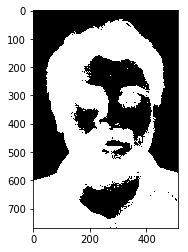

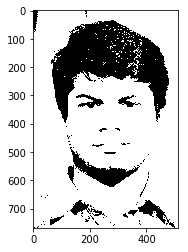

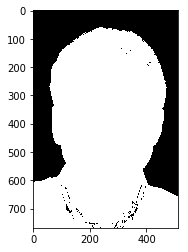

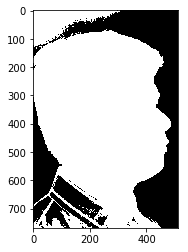

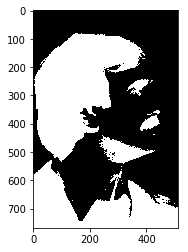

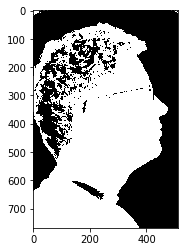

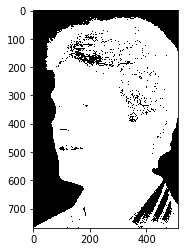

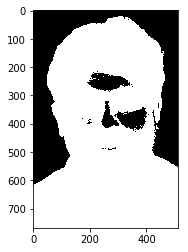

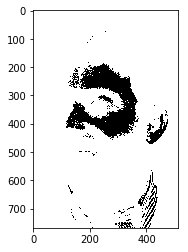

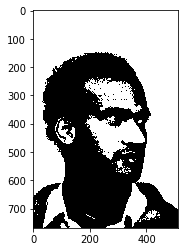

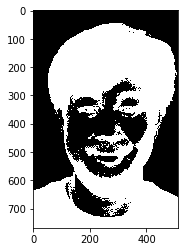

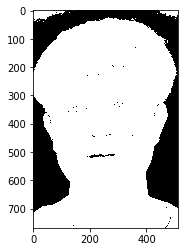

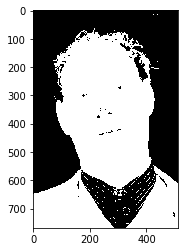

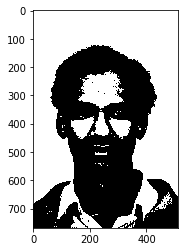

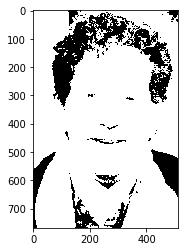

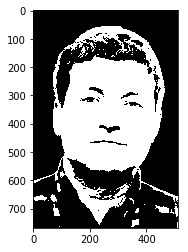

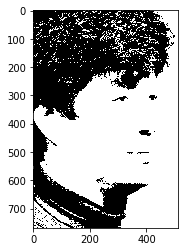

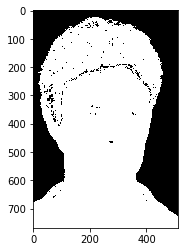

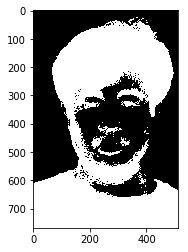

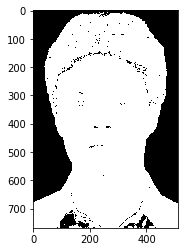

In [77]:
for img_path in glob.glob("Images/Original Images/*.jpg"):

    bgr_img=cv2.imread(img_path)
    bgr_img=cv2.cvtColor(bgr_img,cv2.COLOR_BGR2HSV)
    reshaped_bgr =bgr_img.reshape(bgr_img.shape[0] * bgr_img.shape[1],bgr_img.shape[2])
    kmeans=KMeans(n_clusters=3)
    quantized_img_predicted=kmeans.fit_predict(reshaped_bgr)

    quantized_img = [ kmeans.cluster_centers_[cl] for cl in quantized_img_predicted ]
    quantized_img=np.array(quantized_img).reshape(bgr_img.shape[0] , bgr_img.shape[1],bgr_img.shape[2])
    # plt.imshow(quantized_img.astype(np.uint8))
    # plt.show()
    _,counts=np.unique(quantized_img_predicted, return_counts=True)
    centroid_having_max_instances=np.argmax(counts)

    max_centroid_rgb=reshaped_bgr[centroid_having_max_instances==quantized_img_predicted]

    max_range_rgb=np.max(max_centroid_rgb,axis=0)
    min_range_rgb=np.min(max_centroid_rgb,axis=0)

    plt.imshow(cv2.cvtColor(cv2.inRange(bgr_img,min_range_rgb,max_range_rgb),cv2.COLOR_GRAY2RGB))
    plt.show()

In [61]:
_,counts=np.unique(quantized_img_predicted, return_counts=True)
centroid_having_max_instances=np.argmax(counts)

max_centroid_rgb=reshaped_bgr[centroid_having_max_instances==quantized_img_predicted]

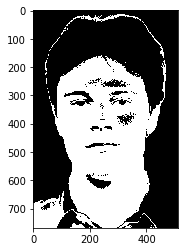

In [70]:
max_range_rgb=np.max(max_centroid_rgb,axis=0)
min_range_rgb=np.min(max_centroid_rgb,axis=0)

plt.imshow(cv2.cvtColor(cv2.inRange(bgr_img,min_range_rgb,max_range_rgb),cv2.COLOR_GRAY2BGR))
plt.show()

In [21]:
def kmeans__(X, nclusters):
    """Perform k-means clustering with nclusters clusters on data set X.

    Returns mu, an ordered list of the cluster centroids and clusters, a
    list of nclusters lists containing the clustered points from X.

    X is an array of of shape (n,m) containing n data points (observations)
    each of dimension m.
    nclusters (also commonly referred to as K) is the number of clusters to
    partition the data into.

    """

    def assign_clusters(X, mu):
        """Assign points from X to clusters centered on points mu."""

        # The clustered points will be put in m independent lists in clusters:
        m = len(mu)
        clusters = [[] for i in range(m)]
        # Assign each data point (observation) to a cluster indexed by k such
        # that the squared distance between the observation and that cluster's
        # mean is a minimum.
        for x in X:
            k = min([(idx, (x-av) @ (x-av)) for idx, av in enumerate(mu)],
                    key=lambda e:e[1])[0]
            clusters[k].append(x)
        return clusters

    def move_centroids(mu, clusters):
        """Move the centroids of each cluster to that cluster's average."""

        mu = [np.mean(clusters[k], axis=0) for k in range(len(mu))]
        return mu

    def is_converged(mu, oldmu):
        """Return True if the centroids mu and oldmu are the same.

        If the centroid positions are the same the clustering has converged.

        """

        return np.allclose(np.sort(mu, axis=1), np.sort(oldmu, axis=1))

    # Pick some random data points as the initial cluster centroids.
    mu = X[np.random.choice(X.shape[0], nclusters, replace=False),:]
    # Iterate the k-means algorithm to convergence.
    while True:
        oldmu = mu
        clusters = assign_clusters(X, mu)
        mu = move_centroids(mu, clusters)
        if is_converged(mu, oldmu):
            break

    return mu, clusters

In [22]:
kmeans__(reshaped_bgr,5)

([array([52.70760578, 67.42141328, 83.23556078]),
  array([138.30198827, 146.11030287, 129.3899396 ]),
  array([ 74.82898054,  96.79064813, 114.10655682]),
  array([33.18439868, 35.21223413, 33.31804254]),
  array([245.33943291, 250.48042867, 226.01217236])],
 [[array([68, 90, 88], dtype=uint8),
   array([55, 74, 77], dtype=uint8),
   array([57, 78, 79], dtype=uint8),
   array([62, 80, 81], dtype=uint8),
   array([63, 81, 82], dtype=uint8),
   array([57, 75, 76], dtype=uint8),
   array([51, 69, 70], dtype=uint8),
   array([49, 67, 68], dtype=uint8),
   array([45, 63, 64], dtype=uint8),
   array([47, 65, 66], dtype=uint8),
   array([60, 78, 79], dtype=uint8),
   array([69, 87, 88], dtype=uint8),
   array([65, 83, 84], dtype=uint8),
   array([65, 80, 82], dtype=uint8),
   array([63, 78, 80], dtype=uint8),
   array([65, 78, 80], dtype=uint8),
   array([64, 77, 79], dtype=uint8),
   array([63, 76, 78], dtype=uint8),
   array([59, 80, 78], dtype=uint8),
   array([55, 76, 74], dtype=uint8),


In [13]:
import numpy as np

def kMeans(X, K, maxIters = 300, plot_progress = None):

    centroids = X[np.random.choice(np.arange(len(X)), K)]
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([np.dot(x_i-y_k, x_i-y_k) for y_k in centroids]) for x_i in X])
        # Ensure we have K clusters, otherwise reset centroids and start over
        # If there are fewer than K clusters, outcome will be nan.
        if (len(np.unique(C)) < K):
            centroids = X[np.random.choice(np.arange(len(X)), K)]
        else:
            # Move centroids step 
            centroids = [X[C == k].mean(axis = 0) for k in range(K)]
        if plot_progress != None: plot_progress(X, C, np.array(centroids))
    return np.array(centroids) , C

In [14]:
kMeans(reshaped_bgr,4)

KeyboardInterrupt: 

In [15]:
def initialize_clusters(points, k):
    """Initializes clusters as k randomly selected points from points."""
    return points[np.random.randint(points.shape[0], size=k)]
    
# Function for calculating the distance between centroids
def get_distances(centroid, points):
    """Returns the distance the centroid is from each data point in points."""
    return np.linalg.norm(points - centroid, axis=1)
def kmeans_(X,k,maxiter=50):

    # Initialize our centroids by picking random data points
    centroids = initialize_clusters(X, k)

    # Initialize the vectors in which we will store the
    # assigned classes of each data point and the
    # calculated distances from each centroid
    classes = np.zeros(X.shape[0], dtype=np.float64)
    distances = np.zeros([X.shape[0], k], dtype=np.float64)

    # Loop for the maximum number of iterations
    for i in range(maxiter):

        # Assign all points to the nearest centroid
        for i, c in enumerate(centroids):
            distances[:, i] = get_distances(c, X)

        # Determine class membership of each point
        # by picking the closest centroid
        classes = np.argmin(distances, axis=1)

        # Update centroid location using the newly
        # assigned data point classes
        for c in range(k):
            centroids[c] = np.mean(X[classes == c], 0)
    return centroids,classes

(array([[117, 125, 122],
        [ 90, 107, 112],
        [ 82, 101, 115],
        [ 79, 102, 117]], dtype=uint8), array([0, 0, 0, ..., 1, 1, 1]))

In [11]:
kmeans.cluster_centers_

array([[ 60.19281482,  78.48781421,  96.34504882],
       [244.92226136, 250.15287771, 225.67948115],
       [115.85996031, 129.59213595, 125.50176135],
       [ 34.6541542 ,  37.47162311,  37.00308958]])

In [8]:
quantized_img=kmeans.fit_predict(reshaped_bgr)
kmeans.transform(quantized_img)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. ... 2. 2. 2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [9]:
reshaped_bgr.shape

(393216, 3)

In [49]:
kmeans.cluster_centers_

array([[ 34.65373034,  37.47040128,  37.00121032],
       [244.94155965, 250.16816798, 225.69457485],
       [ 60.30834733,  78.62143339,  96.46067577],
       [116.49635405, 130.08757853, 125.65082129]])

In [51]:
quantized_img[kmeans.cluster_centers_]

IndexError: arrays used as indices must be of integer (or boolean) type

In [58]:
import numpy as np

def cluster_centroids(data, clusters, k=None):
    """Return centroids of clusters in data.

    data is an array of observations with shape (A, B, ...).

    clusters is an array of integers of shape (A,) giving the index
    (from 0 to k-1) of the cluster to which each observation belongs.
    The clusters must all be non-empty.

    k is the number of clusters. If omitted, it is deduced from the
    values in the clusters array.

    The result is an array of shape (k, B, ...) containing the
    centroid of each cluster.

    >>> data = np.array([[12, 10, 87],
    ...                  [ 2, 12, 33],
    ...                  [68, 31, 32],
    ...                  [88, 13, 66],
    ...                  [79, 40, 89],
    ...                  [ 1, 77, 12]])
    >>> cluster_centroids(data, np.array([1, 1, 2, 2, 0, 1]))
    array([[ 79.,  40.,  89.],
           [  5.,  33.,  44.],
           [ 78.,  22.,  49.]])

    """
    if k is None:
        k = np.max(clusters) + 1
    result = np.empty(shape=(k,) + data.shape[1:])
    for i in range(k):
        np.mean(data[clusters == i], axis=0, out=result[i])
    return result

import scipy.spatial

def kmeans(data, k=None, centroids=None, steps=20):
    """Divide the observations in data into clusters using the k-means
    algorithm, and return an array of integers assigning each data
    point to one of the clusters.

    centroids, if supplied, must be an array giving the initial
    position of the centroids of each cluster.

    If centroids is omitted, the number k gives the number of clusters
    and the initial positions of the centroids are selected randomly
    from the data.

    The k-means algorithm adjusts the centroids iteratively for the
    given number of steps, or until no further progress can be made.

    >>> data = np.array([[12, 10, 87],
    ...                  [ 2, 12, 33],
    ...                  [68, 31, 32],
    ...                  [88, 13, 66],
    ...                  [79, 40, 89],
    ...                  [ 1, 77, 12]])
    >>> np.random.seed(73)
    >>> kmeans(data, k=3)
    array([1, 1, 2, 2, 0, 1])

    """
    if centroids is not None and k is not None:
        assert(k == len(centroids))
    elif centroids is not None:
        k = len(centroids)
    elif k is not None:
        # Forgy initialization method: choose k data points randomly.
        centroids = data[np.random.choice(np.arange(len(data)), k, False)]
    else:
        raise RuntimeError("Need a value for k or centroids.")

    for _ in range(max(steps, 1)):
        # Squared distances between each point and each centroid.
        sqdists = scipy.spatial.distance.cdist(centroids, data, 'sqeuclidean')

        # Index of the closest centroid to each data point.
        clusters = np.argmin(sqdists, axis=0)

        new_centroids = cluster_centroids(data, clusters, k)
        if np.array_equal(new_centroids, centroids):
            break

        centroids = new_centroids

    return clusters

array([[[244.94155965, 250.16816798, 225.69457485],
        [244.94155965, 250.16816798, 225.69457485],
        [244.94155965, 250.16816798, 225.69457485],
        ...,
        [244.94155965, 250.16816798, 225.69457485],
        [244.94155965, 250.16816798, 225.69457485],
        [244.94155965, 250.16816798, 225.69457485]],

       [[244.94155965, 250.16816798, 225.69457485],
        [244.94155965, 250.16816798, 225.69457485],
        [244.94155965, 250.16816798, 225.69457485],
        ...,
        [244.94155965, 250.16816798, 225.69457485],
        [244.94155965, 250.16816798, 225.69457485],
        [244.94155965, 250.16816798, 225.69457485]],

       [[244.94155965, 250.16816798, 225.69457485],
        [244.94155965, 250.16816798, 225.69457485],
        [244.94155965, 250.16816798, 225.69457485],
        ...,
        [244.94155965, 250.16816798, 225.69457485],
        [244.94155965, 250.16816798, 225.69457485],
        [244.94155965, 250.16816798, 225.69457485]],

       ...,

      

In [59]:
quantized_img.shape

(768, 512, 3)

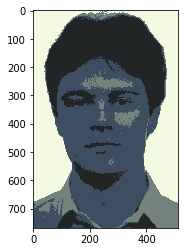

In [47]:
np.unique(quantized_img)

array([0, 1, 2, 3], dtype=int32)

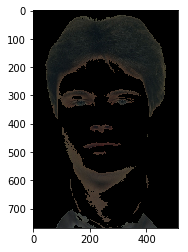

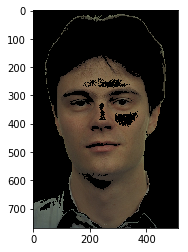

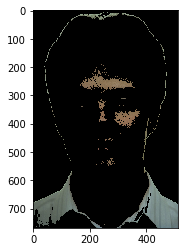

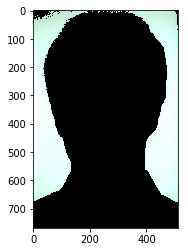

In [44]:
for i in range (len(kmeans.cluster_centers_)):
    mask=cv2.inRange(bgr_img,kmeans.cluster_centers_[i]-40,kmeans.cluster_centers_[i]+40)
    masked_bgr=cv2.bitwise_and(bgr_img,bgr_img,mask=mask)
    rgb_img=cv2.cvtColor(masked_bgr,cv2.COLOR_BGR2RGB)                
    plt.imshow(rgb_img)
    plt.show()

    